# Project Description:

In this project the quality of white wine is explored.

Therfore, a White Wine Quality dataset provided by [Udacity](https://udacity.com) is used. The [dataset](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/wineQualityWhites.csv) contains 4,988 entries representing a wine with 11 variables describing the chemical properties of the wine, 1 variable represents the alcohol percentage and for each wine 1  variable represents its quality is reated by at least 3 wine experts, providing a rating between 0 (very bad) and 10 (very excellent)

# Point of Exploration

Which chemical properties influence the quality of white wines?

# Import Libaries

## Set package repo

In [1]:
# Set the link to the repo in the options
country.code <- 'de'  
url.pattern <- 'https://'  
repo.data.frame <- subset(getCRANmirrors(),
                          CountryCode == country.code & grepl(url.pattern, URL))
options(repos = repo.data.frame$URL)

## Install the pacman and the libaries if nessary

In [2]:
# Installs the packagemanger pacman if nesseary
suppressMessages(if (!require("pacman")) install.packages("pacman"))
    
# Defines the used packages
suppressMessages(packages <-c("ggplot2",
                              "knitr",
                              "dplyr",
                              "ggthemes",
                              "GGally",
                              "psych"))

# Install the packages with the packetmanger
pacman::p_load(packages)

## Load Libaries

In [3]:
suppressMessages(library("ggplot2"))
suppressMessages(library("knitr"))
suppressMessages(library("dplyr"))
suppressMessages(library("plyr"))
suppressMessages(library("ggthemes"))
suppressMessages(library("GGally"))
suppressMessages(library("psych"))
suppressMessages(library("grid"))

# Set Global Varibales

In [4]:
# Set url to data resource
URL <- "https://s3.amazonaws.com/udacity-hosted-downloads/ud651/wineQualityWhites.csv"
# Set local path to data    
PATH <- paste('data/', tail(strsplit(URL, "/")[[1]],1))

# Set ploting theme
theme_set(theme_minimal(12)) 

#opts_chunk$set(fig.width = 6, fig.height = 6)
library("repr")
options(repr.plot.width=4, repr.plot.height=3)

# Project Preparation

## Define individual functions

In [5]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
    # Generates a grid of plots from a given list of plots
    #
    # Args:
    #  plotlist: 
    #  file:
    #  cols: 
    #  layout: 
    #
    # Returns:
    # None
    

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

## Download the data

In [6]:
load_from_online_source <- function (url){
    # Downloads a file from a give online source and stores it to the disk
    #
    # Args:
    #  url: String representing the online resource
    #
    # Returns:
    #  None
    
    # Create the dir if not exits
    ifelse(!dir.exists('data'), dir.create('data'), FALSE)
    
    # Return the last element of url as filename
    filename <- tail(strsplit(URL, "/")[[1]],1)
    
    # Set path var for the stored file
    path <- paste('data/', filename)
    
    # Download the file to path
    download.file(url, path, mode="wb")
}

#Downloads the data to the data folder of a local repository after you run it once you can uncomment this lines.
#To prevent the code from downloading the data every time you run the code.
 
load_from_online_source(URL)

## Load the Dataset

In [7]:
PATH

# Load the data from file
data <-read.csv(PATH,
                header=TRUE,
                sep = ',',  
                na.strings = "?")

# Rename the x column to id
names(data)[names(data) == "X"] <- "id"

# Inspect the first 5 rows
head(data)

[1] "data/ wineQualityWhites.csv"

id,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


# Data Exploration

## Summary of the dataset

### Explore the cloumn and entrie count

In [8]:
dim(data)

[1] 4898   13

### Explore the column names

In [9]:
names(data)

[1] "id"                   "fixed.acidity"        "volatile.acidity"    
 [4] "citric.acid"          "residual.sugar"       "chlorides"           
 [7] "free.sulfur.dioxide"  "total.sulfur.dioxide" "density"             
[10] "pH"                   "sulphates"            "alcohol"             
[13] "quality"

### Column types

In [10]:
str(data)

'data.frame':	4898 obs. of  13 variables:
 $ id                  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


### Five-number summary

In [11]:
summary(data)

       id       fixed.acidity    volatile.acidity  citric.acid    
 Min.   :   1   Min.   : 3.800   Min.   :0.0800   Min.   :0.0000  
 1st Qu.:1225   1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700  
 Median :2450   Median : 6.800   Median :0.2600   Median :0.3200  
 Mean   :2450   Mean   : 6.855   Mean   :0.2782   Mean   :0.3342  
 3rd Qu.:3674   3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900  
 Max.   :4898   Max.   :14.200   Max.   :1.1000   Max.   :1.6600  
 residual.sugar     chlorides       free.sulfur.dioxide total.sulfur.dioxide
 Min.   : 0.600   Min.   :0.00900   Min.   :  2.00      Min.   :  9.0       
 1st Qu.: 1.700   1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0       
 Median : 5.200   Median :0.04300   Median : 34.00      Median :134.0       
 Mean   : 6.391   Mean   :0.04577   Mean   : 35.31      Mean   :138.4       
 3rd Qu.: 9.900   3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0       
 Max.   :65.800   Max.   :0.34600   Max.   :289.00      Max.   :440.0

The dataset consists of 13 variables, with about 4,898 observations. 
The quality column range from 3 to 9. The quality column which interests us most has a median at 6, the min value at 3 and the max value at 9.

## Univariate Plots Section

### Explore the wine quality

Plot a bar chart to explore the distribution of the quality feature.

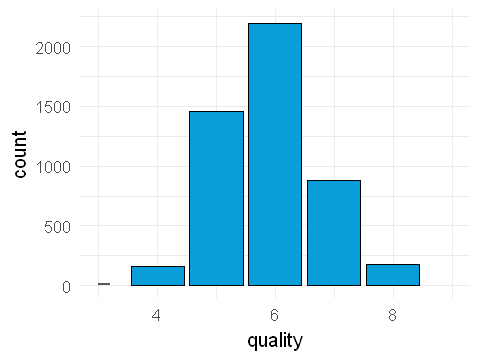

In [12]:
# Set the figsize
options(repr.plot.width=4, repr.plot.height=3)

qplot(x = quality, data = data, bins=30) +
 geom_bar(color = 'black', fill = '#099DD9') +
 xlim(3,9) 

The point estimators mean, modus from the five-number summary already indicate, that the column quality is normal distributed. Now the bar plot hardens that the quality column is normal distributed around the value 6.

### Explore chemical properties

Plot bar charts of the chemical features to explore the distributions inside the features.

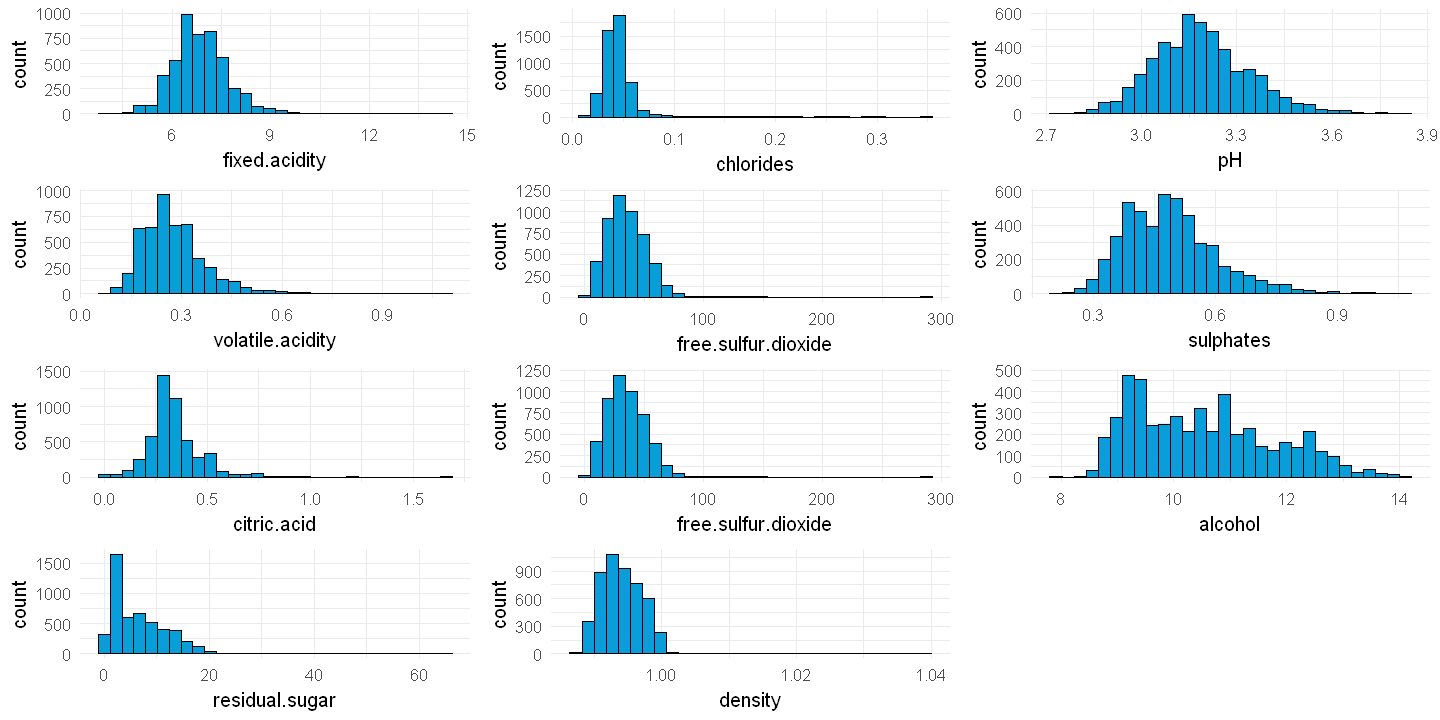

In [13]:
# Set the figsize
options(repr.plot.width=12, repr.plot.height=6)

p1 <- qplot(x = fixed.acidity, data = data, bins=30)  +
 geom_histogram(color = 'black', fill = '#099DD9', bins=30)

p2 <- qplot(x = volatile.acidity, data = data, bins=30)  +
 geom_histogram(color = 'black', fill = '#099DD9', bins=30) 

p3 <- qplot(x = citric.acid, data = data, bins=30)  +
 geom_histogram(color = 'black', fill = '#099DD9', bins=30) 

p4 <- qplot(x = residual.sugar, data = data, bins=30)  +
 geom_histogram(color = 'black', fill = '#099DD9', bins=30) 

p5 <- qplot(x = chlorides, data = data, bins=30)  +
 geom_histogram(color = 'black', fill = '#099DD9', bins=30)

p6 <- qplot(x = free.sulfur.dioxide, data = data, bins=30)  +
 geom_histogram(color = 'black', fill = '#099DD9', bins=30) 

p7 <- qplot(x = free.sulfur.dioxide, data = data, bins=30)  +
 geom_histogram(color = 'black', fill = '#099DD9', bins=30) 

p8 <- qplot(x = density, data = data, bins=30)  +
 geom_histogram(color = 'black', fill = '#099DD9', bins=30)

p9 <- qplot(x = pH, data = data, bins=30)  +
 geom_histogram(color = 'black', fill = '#099DD9', bins=30)

p10 <- qplot(x = sulphates, data = data, bins=30)  +
 geom_histogram(color = 'black', fill = '#099DD9', bins=30) 

p11 <- qplot(x = alcohol, data = data, bins=30)  +
 geom_histogram(color = 'black', fill = '#099DD9', bins=30) 

multiplot(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, cols=3)

The bar charts indicate the distributions of the features:
*  fixed.acidity(normal)
*  chlorides(normal)
*  ph(normal)
*  volatile.acidity(normal)
*  free.sulfur.dioxide(normal)
*  citric.acid(normal)
*  density(right skewed)
*  alcohol(unclear)
*  residual.sugar(unclear)

Further exploration of the features residual.sugar and alcohol by using a logarithmic scale.

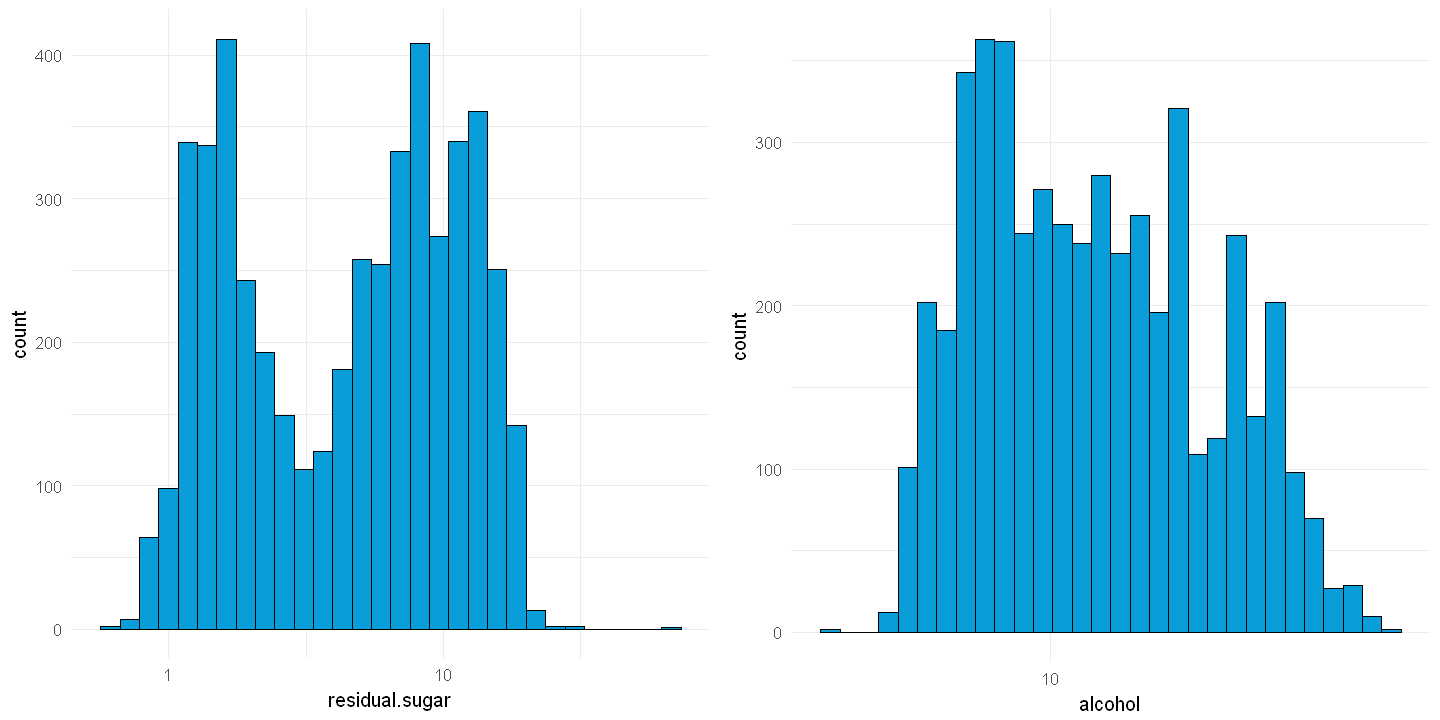

In [14]:
p1 <- qplot(x = residual.sugar, data = data, bins=30)  +
 geom_histogram(color = 'black',
                fill = '#099DD9', bins=30)  +
 scale_x_log10()

p2 <- qplot(x = alcohol, data = data, bins=30)  +
 geom_histogram(color = 'black',
                fill = '#099DD9', bins=30)  +
 scale_x_log10()

multiplot(p1, p2, cols=2)

It seems that the feature residual.sugar is bimodal and alcohol is right skewed.

## Univariate Analysis

### Structure of the dataset

There are 4898 white wines in the dataset with 13 features ('fixed.acidity' 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'). The variable 'quality' is the only ordered factor variable. It ranges from 3 to 9, there 3 is the worst quality and 9 the best quality in the dataset.

Other obersvations:
* Most white wines have a quality of 6
* The median qulity is 6

### Features of interest

The aim of this analysis is to evalute the features that are best to describe the quality of a white wine. It seems that the feature alcohol is important to determine which degree of quality a white wine  has.

### Notable distributions of the dataset

Most of the features in the dataset seem to be normal distributed:
*  quality(normal)
*  fixed.acidity(normal)
*  chlorides(normal)
*  ph(normal)
*  volatile.acidity(normal)
*  free.sulfur.dioxide(normal)
*  citric.acid(normal)
*  density(right skewed)
*  alcohol(right skewed)
*  residual.sugar(bimodal)

But there are 3 exceptions "density" and "alcohol" which both are right skewed and residual.sugar which is bimodal.

## Bivariate Plots Section

### Corrleation analysis

In [15]:
cor(data)

,id,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
id,1.000000000,-0.25581431,0.002857966,-0.149899918,0.006623775,-0.04564519,-0.0119289106,-0.161979037,-0.18597610,-0.1157741316,0.009807759,0.21365624,0.035763247
fixed.acidity,-0.255814305,1.00000000,-0.022697290,0.289180698,0.089020701,0.02308564,-0.0493958591,0.091069756,0.26533101,-0.4258582910,-0.017142985,-0.12088112,-0.113662831
volatile.acidity,0.002857966,-0.02269729,1.000000000,-0.149471811,0.064286060,0.07051157,-0.0970119393,0.089260504,0.02711385,-0.0319153683,-0.035728147,0.06771794,-0.194722969
citric.acid,-0.149899918,0.28918070,-0.149471811,1.000000000,0.094211624,0.11436445,0.0940772210,0.121130798,0.14950257,-0.1637482114,0.062330940,-0.07572873,-0.009209091
residual.sugar,0.006623775,0.08902070,0.064286060,0.094211624,1.000000000,0.08868454,0.2990983537,0.401439311,0.83896645,-0.1941334540,-0.026664366,-0.45063122,-0.097576829
chlorides,-0.045645192,0.02308564,0.070511571,0.114364448,0.088684536,1.00000000,0.1013923521,0.198910300,0.25721132,-0.0904394560,0.016762884,-0.36018871,-0.209934411
free.sulfur.dioxide,-0.011928911,-0.04939586,-0.097011939,0.094077221,0.299098354,0.10139235,1.0000000000,0.615500965,0.29421041,-0.0006177961,0.059217246,-0.25010394,0.008158067
total.sulfur.dioxide,-0.161979037,0.09106976,0.089260504,0.121130798,0.401439311,0.19891030,0.6155009650,1.000000000,0.52988132,0.0023209718,0.134562367,-0.44889210,-0.174737218
density,-0.185976097,0.26533101,0.027113845,0.149502571,0.838966455,0.25721132,0.2942104109,0.529881324,1.00000000,-0.0935914935,0.074493149,-0.78013762,-0.307123313
pH,-0.115774132,-0.42585829,-0.031915368,-0.163748211,-0.194133454,-0.09043946,-0.0006177961,0.002320972,-0.09359149,1.0000000000,0.155951497,0.12143210,0.099427246


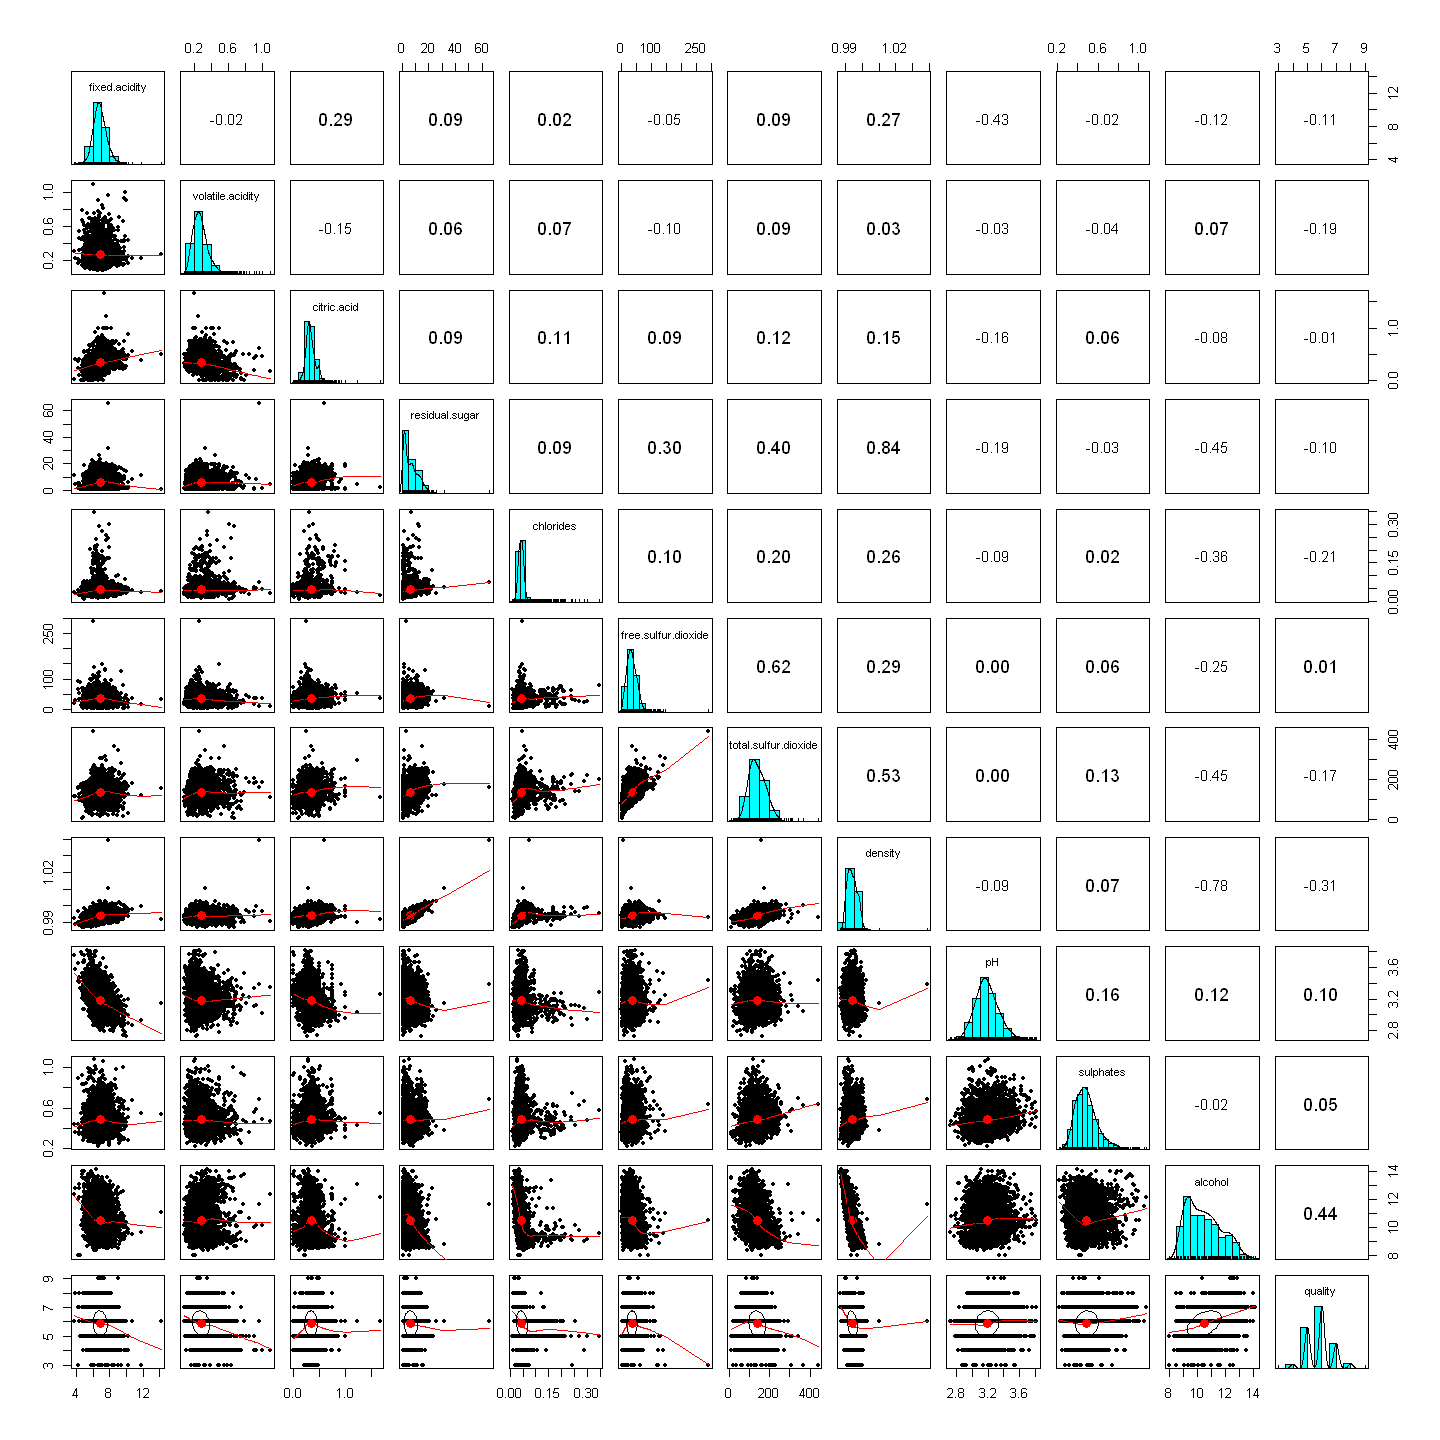

In [16]:
# Set the figsize
options(repr.plot.width=12, repr.plot.height=12)

# Plot matrix scatterplot using the libary psych
pairs.panels(data[, 2:13])

The exploration of the correlation between the chemical properties of wine and its quality shows that the variables with highest influence are alcohol, density and chlorides.
Alcohol seems to moderatly correlate postive, density to moderatly correlate negativly and chlorides weakly correlate negativly with the quality of wine.

### Further analysis of correlation between alcohol, density and chlorides with the quality

#### Correlation between alcohol and quality

Using scatter plots and a tendency plot to investigate the correlation between the two features.

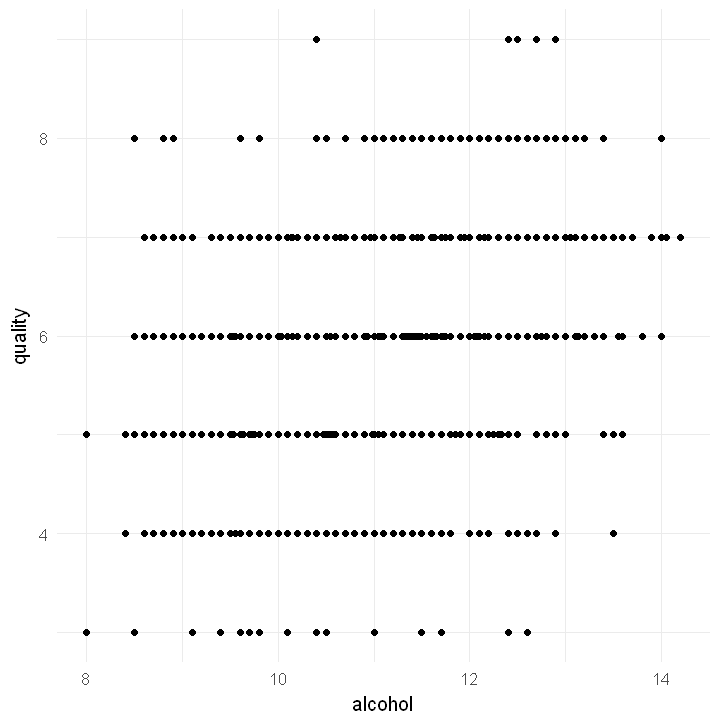

In [17]:
# Set the figsize
options(repr.plot.width=6, repr.plot.height=6)

# Plot scatter plot
ggplot(aes(y = quality, x = alcohol), data = data) +
 geom_point() 

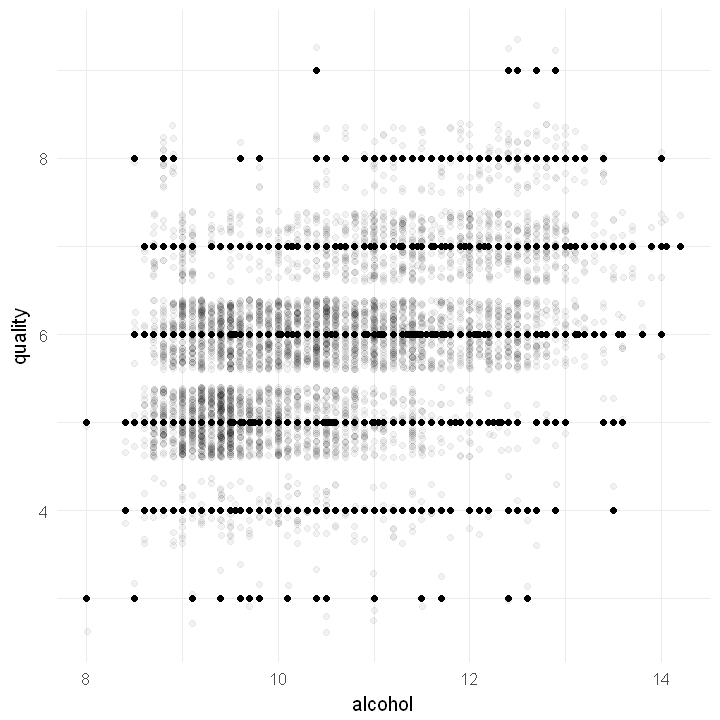

In [18]:
# Plot scatter plot with jitter effect
ggplot(aes(y = quality, x = alcohol), data = data) + 
    geom_point() +
    geom_point(alpha = 1/20, position = 'jitter')  

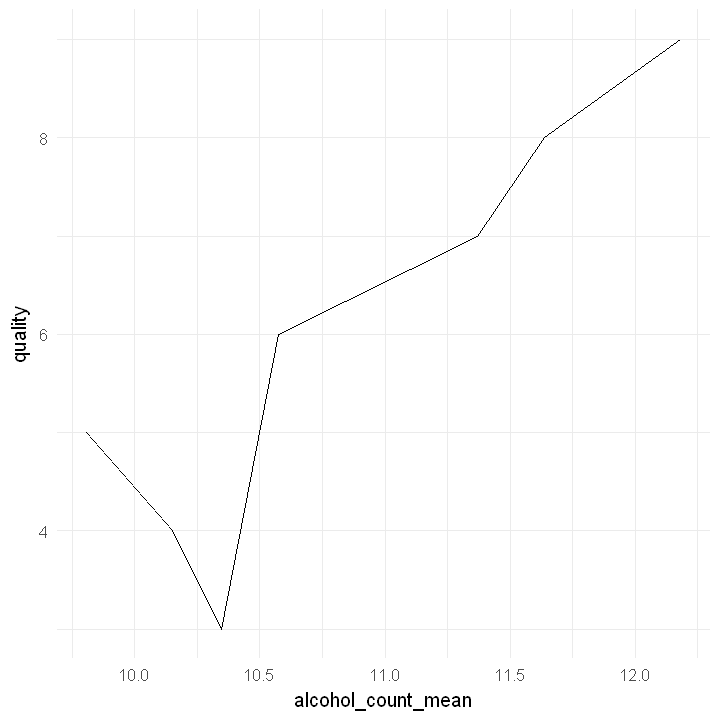

In [19]:
# Plot the tendency using a line chart
quality_groups <- group_by(data, quality)
data.alco_by_qual <- dplyr::summarise(quality_groups,
                                      alcohol_count_mean = mean(alcohol))

ggplot(aes(x = alcohol_count_mean , y = quality),
       data = data.alco_by_qual) +
    geom_line()

The scatter plot and the tendency plot showed that if the alcohol percentage increases also the quality increases. With on exception for a quality of 5. This annormaly should be further analysed.

#### Correlation between density and quality

Using scatter plots and a tendency plot to investigate the correlation between the two features.

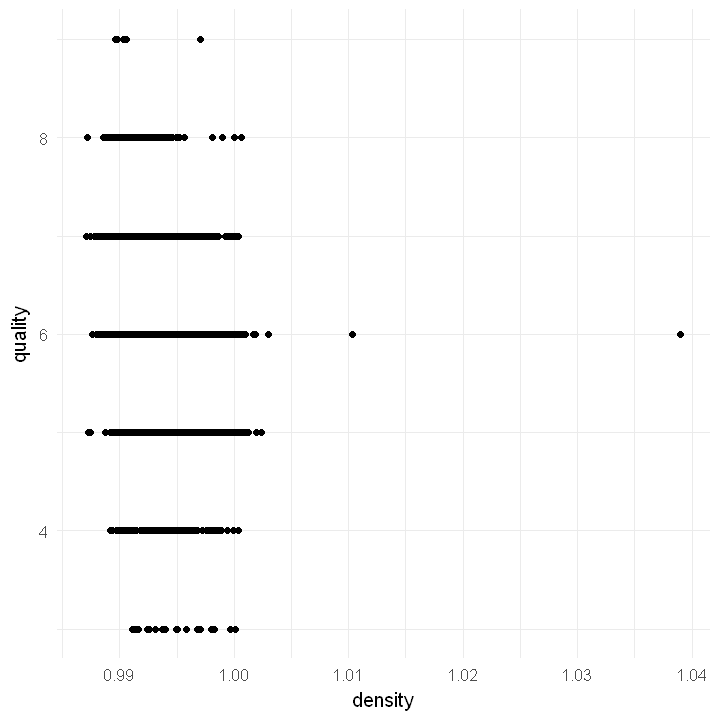

In [20]:
# Plot scatter plot
ggplot(aes(x = density, y = quality), data = data) +
    geom_point() 

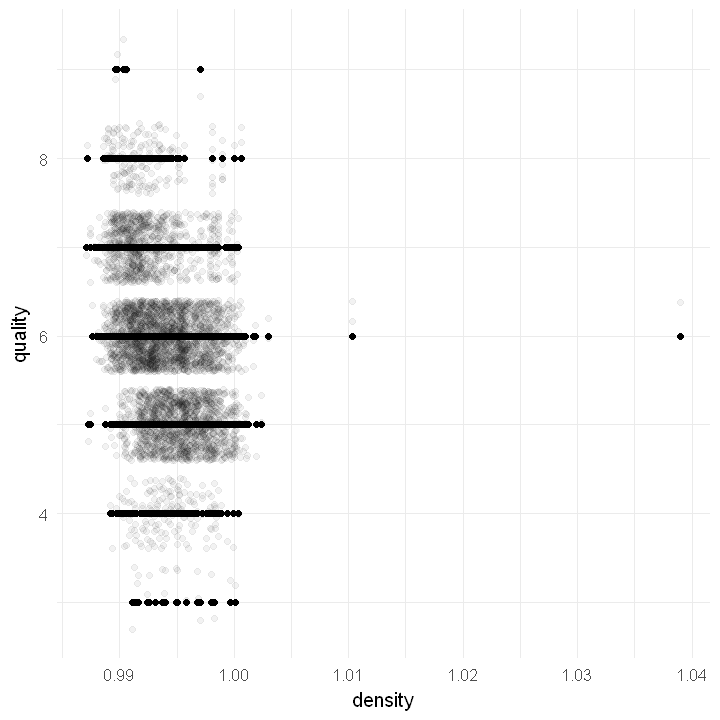

In [21]:
# Plot scatter plot with jitter effect
ggplot(aes(y = quality, x = density), data = data) + 
    geom_point() +
    geom_point(alpha = 1/20, position = 'jitter') 

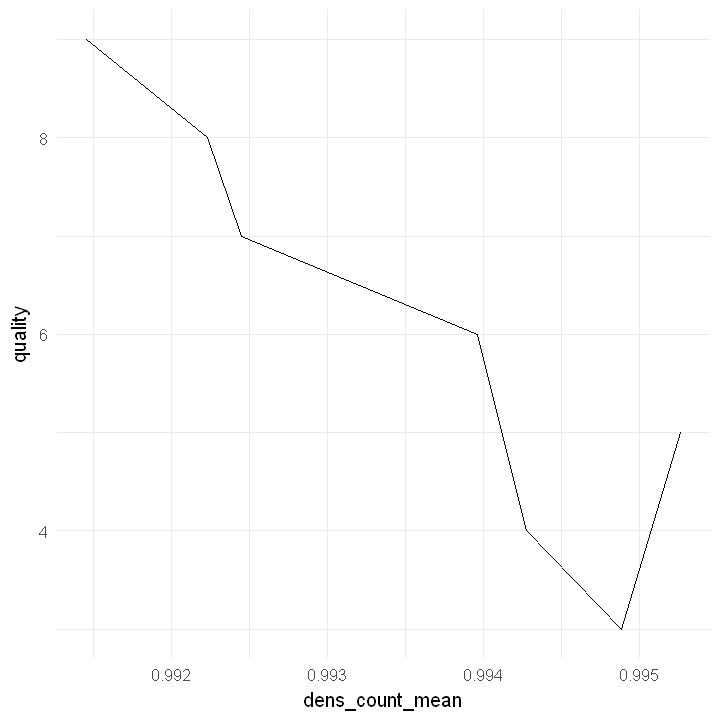

In [22]:
# Plot the tendency using a line chart
quality_groups <- group_by(data, quality)
data.dens_by_qual <- dplyr::summarise(quality_groups,
                              dens_count_mean = mean(density))

ggplot(aes(x = dens_count_mean, y = quality),
       data = data.dens_by_qual) +
    geom_line()

As we already have seen in the analysis of the correlation between density and quality there is a cleary tendency in the data. This time a negative trend, so if the density decreases also the quality decreases.
But again we have a unexpected uptrend at a quality of 5.

#### Correlation between chlorides and quality

Using scatter plots and a tendency plot to investigate the correlation between the two features.

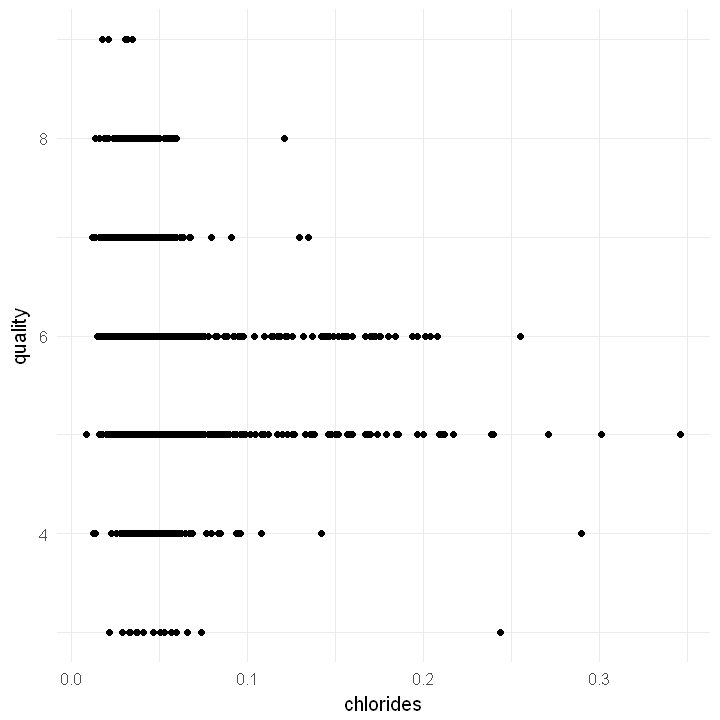

In [23]:
# Plot scatter plot
ggplot(aes(y = quality, x = chlorides),
       data = data) + 
    geom_point() 

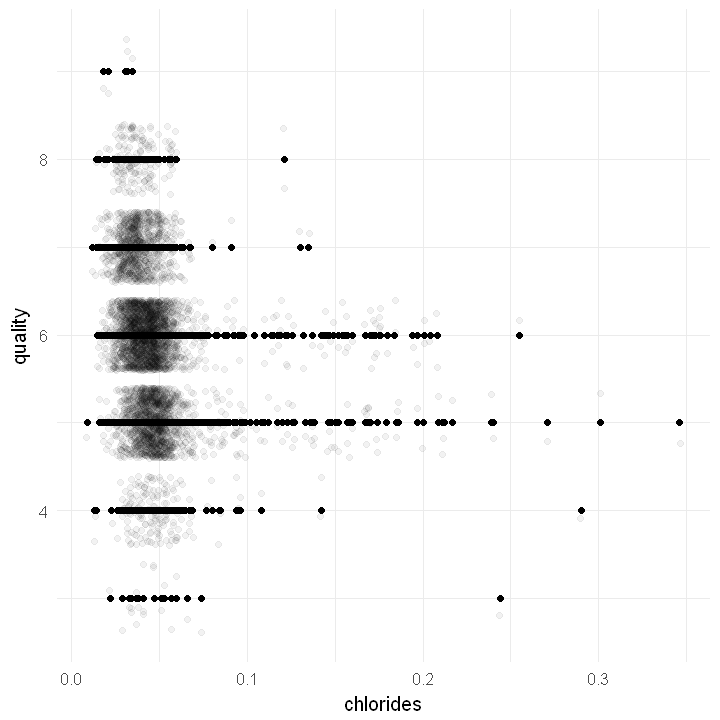

In [24]:
# Plot scatter plot with jitter effect
ggplot(aes(y = quality, x = chlorides),
       data = data) + geom_point() +
    geom_point(alpha = 1/20, position = 'jitter')

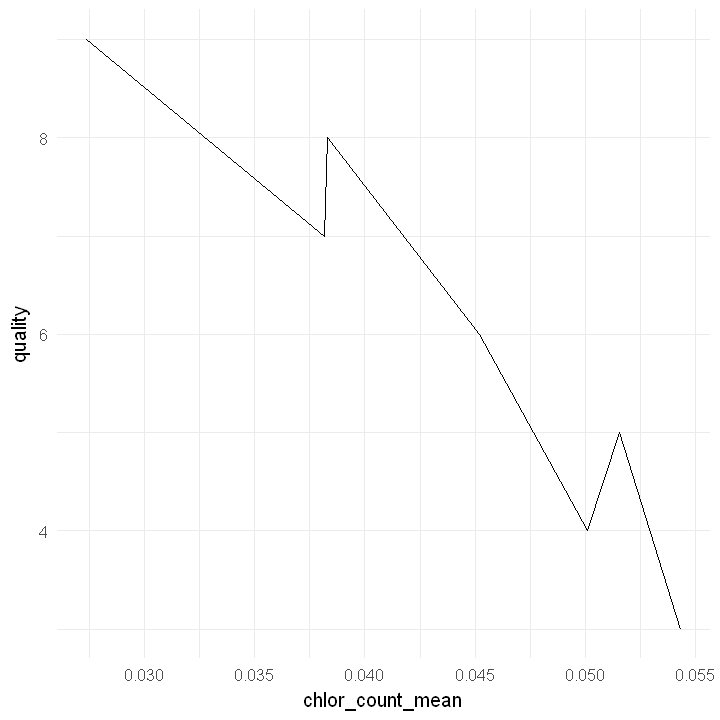

In [25]:
# Plot the tendency using a line chart
quality_groups <- group_by(data, quality)
data.chlor_by_qual <- dplyr::summarise(quality_groups,
                              chlor_count_mean = mean(chlorides))

ggplot(aes(y = quality, x = chlor_count_mean),
       data = data.chlor_by_qual) +
    geom_line()

Again the analysis of the correlation between density and quality shows a cleary negative tendency in the data. But as we have seen before there is discrepancy at a quality of 5.

### Further analysis of the discrepancy at a quality of 5

I expect the reason for the discrepancy at a quality of 5 is a mucher higher variance for the features at a quality of five and therefore, outliers that distort the results.
To furhter analysis this I use boxplot, to show the variance at the different quality levels and highlight the outliers.

#### Boxplots alcohol and quailty

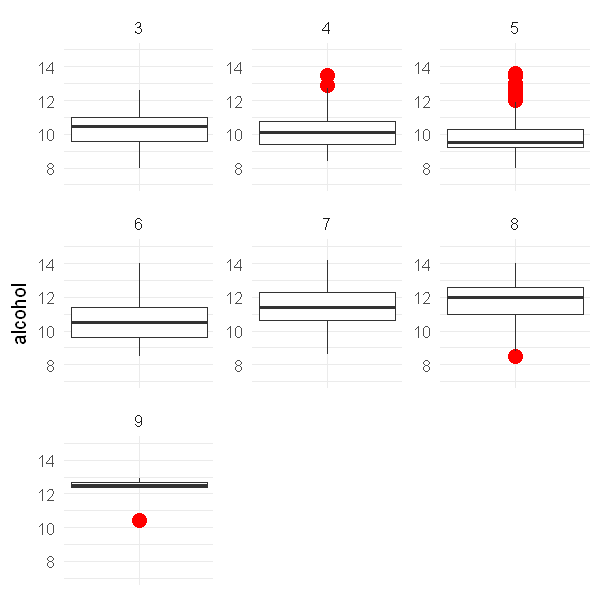

In [26]:
# Set the figsize
options(repr.plot.width=5, repr.plot.height=5)

# Boxplot
ggplot(aes(x = quality, y = alcohol), data = data) + 
  geom_boxplot(outlier.colour="red", outlier.size=4) +
  scale_x_continuous(breaks = 3:9) +
  ylim(7,15) +
  facet_wrap( ~quality, scales="free") +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

#### Boxplots density and quailty

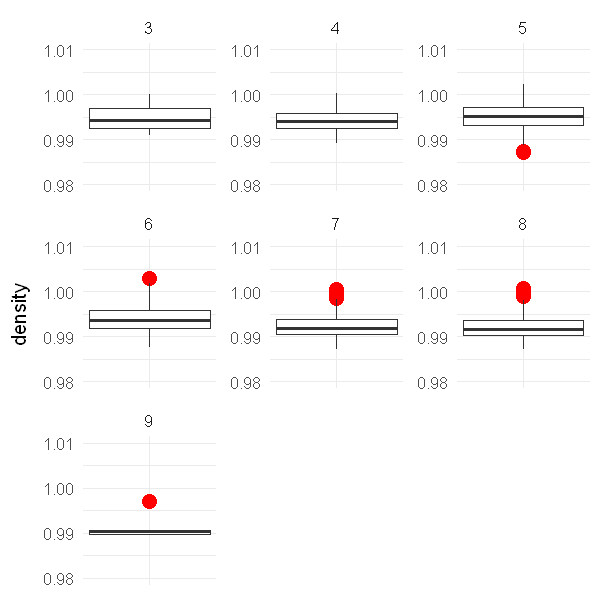

In [27]:
# Set the figsize
options(repr.plot.width=5, repr.plot.height=5)

# Boxplot
ggplot(aes(x = quality, y = density), data = data) + 
  geom_boxplot(outlier.colour="red", outlier.size=4) +
  scale_x_continuous(breaks = 3:9) +
  ylim(0.98,1.01) +
  facet_wrap( ~quality, scales="free") +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

#### Boxplots chlorides and quailty

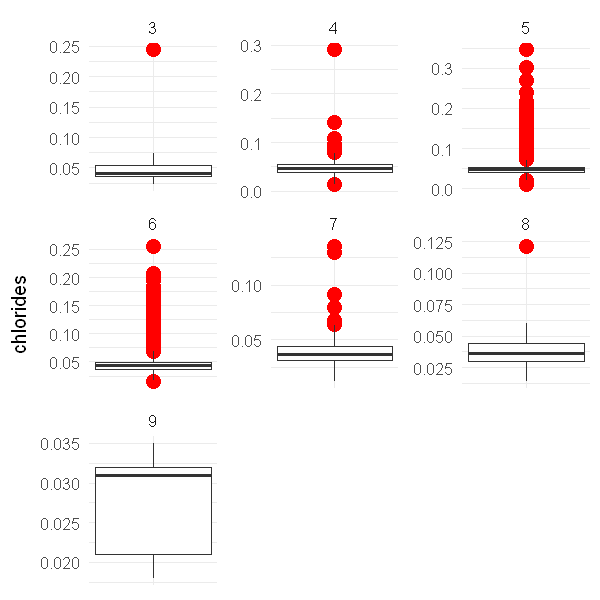

In [28]:
# Set the figsize
options(repr.plot.width=5, repr.plot.height=5)

# Boxplot
ggplot(aes(x = quality, y = chlorides), data = data) + 
  geom_boxplot(outlier.colour="red", outlier.size=4) +
  scale_x_continuous(breaks = 3:9) +
  #ylim(0.98,1.01) +
  facet_wrap( ~quality, scales="free") +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

As already assumed, the boxplots shows that threre are a lot more outliers at a quality of 5 for the features in a diverging direction that causes the discrepancy in the tendency.

## Bivariate Analysis

### Features of interest relationships

As we already expected after the analysis based on a single variable, the feature alcohol has the strongest influence on the quality of a white wine. And generally a higher alcohol percentage seems to lead to a higher quality for all the quality levels expect at level 5. 

### Further relationships

In addtion to the feature alcohol we found to two orther features that influence the quality of a white wine. This is the density of a wine and percentage of chlorides which both influence white wine quality in a negative way.

## Multivariate Plots Section

In [29]:
# Bin the features alchol and quality
data$alcoholBins <- cut(data$alcohol,
                        breaks=seq(8, 15, 2),
                        labels=c("low", "medium", "high"))
data$qualityBins <- cut(data$quality,
                        breaks=seq(3,9,2),
                        labels=c("low", "medium", "high"))

Investigate the count of wines of a specifc quality level based on alcohol percentage and the density.

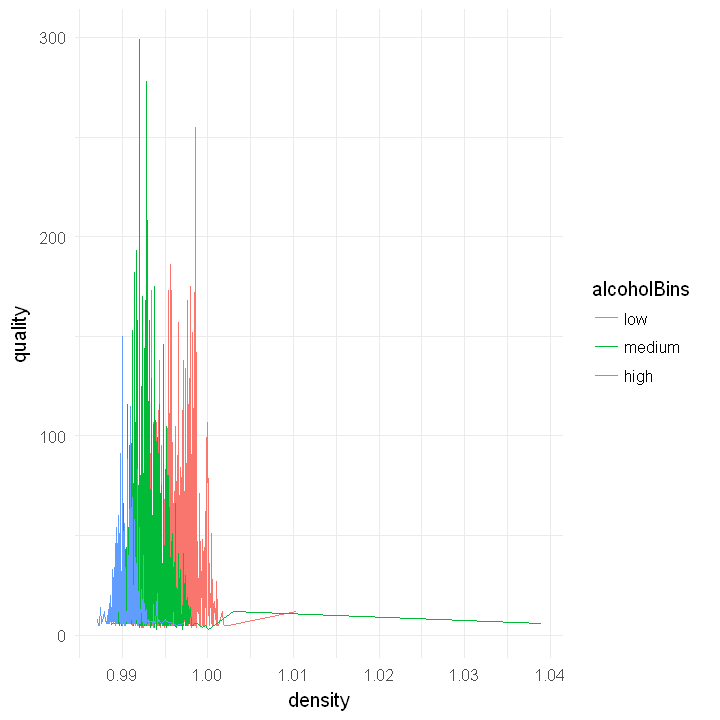

In [30]:
# Set the figsize
options(repr.plot.width=6, repr.plot.height=6)

ggplot(aes(y=quality, x=density),
       data=subset(data, !is.na(alcoholBins))) +
    geom_line(aes(color = alcoholBins),
              stat = 'summary', fun.y = sum)

Investigate the count of wines of a specifc quality level based on alcohol percentage and the chlorides.

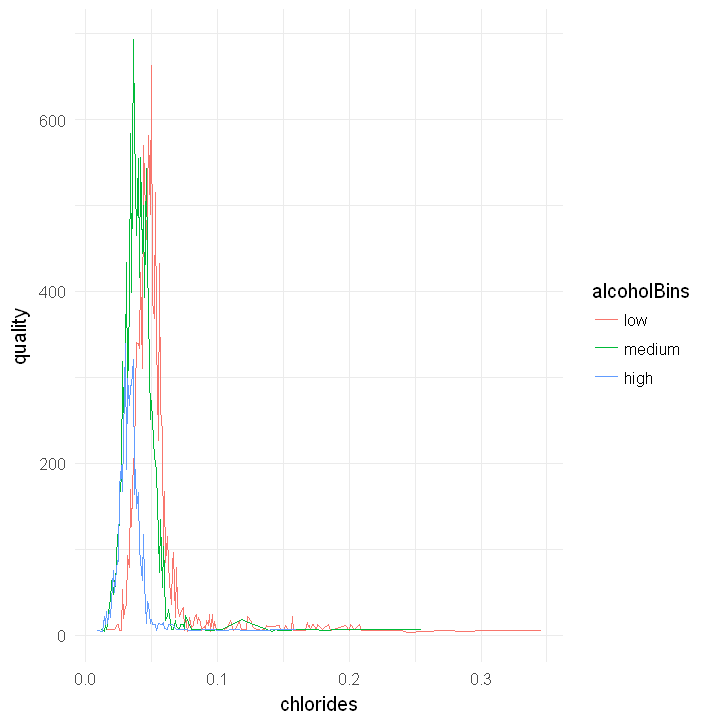

In [31]:
ggplot(aes(y=quality, x=chlorides),
       data=subset(data, !is.na(alcoholBins))) +
    geom_line(aes(color = alcoholBins),
              stat = 'summary', fun.y = sum)

Investigate the count of wines of a specifc alcohol level based on quality and the chlorides.

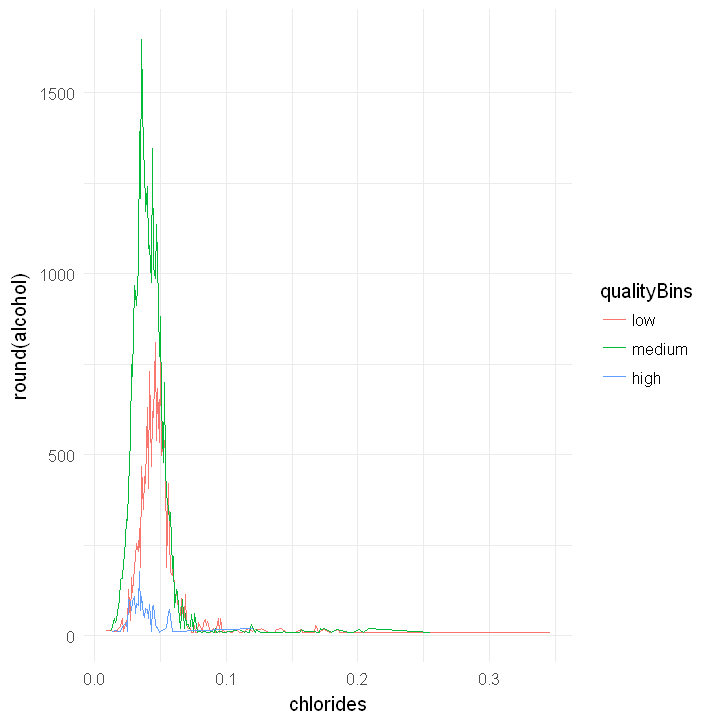

In [32]:
ggplot(aes(x=chlorides, y= round(alcohol)),
       data=subset(data, !is.na(qualityBins))) +
    geom_line(aes(color = qualityBins),
              stat = 'summary', fun.y = sum)

Investigate the count of wines of a specifc density level based on quality and the alcohol percentage.

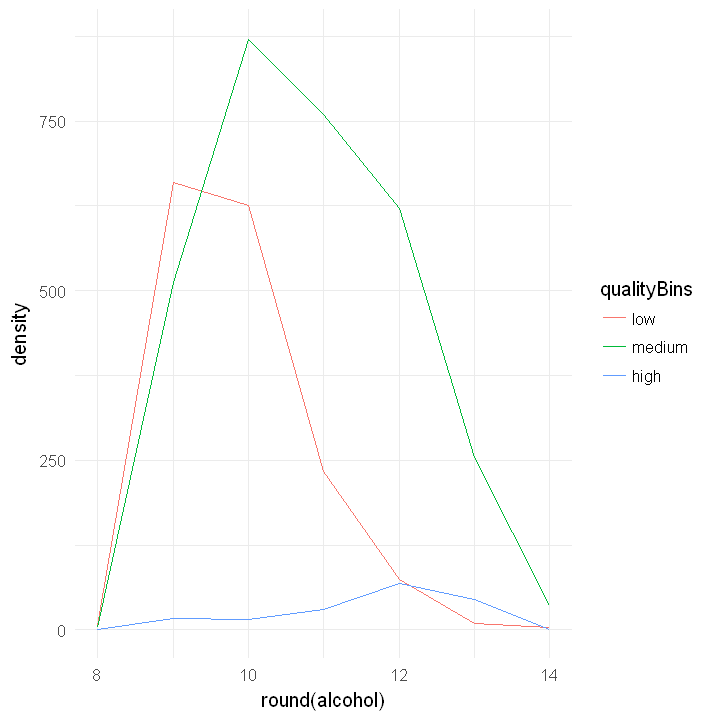

In [33]:
ggplot(aes(y=density, x= round(alcohol)),
       data=subset(data, !is.na(qualityBins))) +
    geom_line(aes(color = qualityBins),
              stat = 'summary', fun.y = sum)

## Multivariate Analysis

The analysis of the relaitonship of multiple features showed some interesting insights.
At a high quality the density for different alcohol percentages does not really differ, 
at a low to medium quality of wine the density have a strong inluence on the quality.
Also this effect is shown for the amount of chlorides for different alcohol percentages does not relly differ at a high quality, 
at a low to medium quality of wine the density have a strong inluence on the quality.

# Final Plots and Summary

## Final plots

The plot shows the the distribution of the quality in the dataset.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


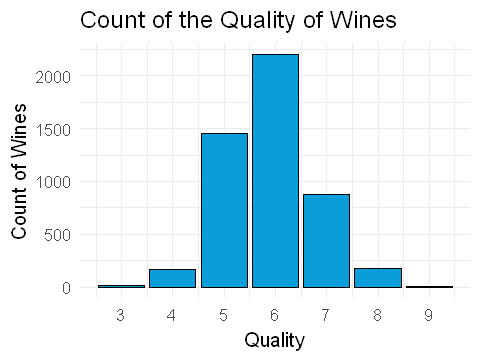

In [34]:
# Set the figsize
options(repr.plot.width=4, repr.plot.height=3)

qplot(x = quality, data = data, bins=30) +
 geom_bar(color = 'black', fill = '#099DD9') +
 xlim(3,9) +
 scale_x_continuous(breaks = 3:9) +
 #scale_y_continuous(breaks = 0:2500) +
 ggtitle("Count of the Quality of Wines") +
 xlab("Quality") +
 ylab("Count of Wines")

The quality of white wines seems to be a normal distributed with a little left skewness. The quality ranges from 3 to 9 so there are no wines that the experts rated below 3 and none of the wines gained a perfect rating.
The most wines have a rating of 6, so the most wines have a medium quality.

The plot should investige the discrepancy of the positive correleation between quality and alcohol at a quality level of 5.

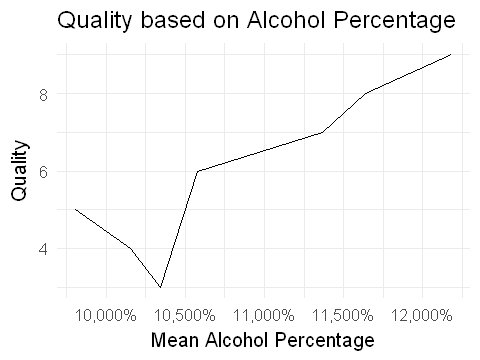

In [35]:
# Plot the tendency using a line chart
quality_groups <- group_by(data, quality)
data.alco_by_qual <- dplyr::summarise(quality_groups,
                                      alcohol_count_mean = mean(alcohol))

ggplot(aes(x = alcohol_count_mean*10, y = quality),
       data = data.alco_by_qual) +
    geom_line() +
 scale_x_continuous(labels = scales::percent) +
 ggtitle("Quality based on Alcohol Percentage ") +
 xlab("Mean Alcohol Percentage") +
 ylab("Quality")

There is a clear tendency of the influence of some features for the wine quality. For example if the alcohol percentage increases also the average quality of the wines increase, with on exception the quality at a level of 5.

A set of boxplots is used to investige if the the discrepancy at a quality level of 5 is based on outliers:

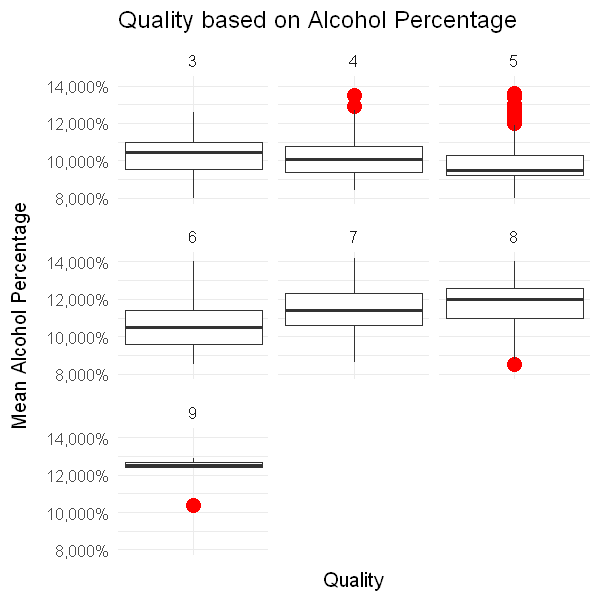

In [36]:
# Set the figsize
options(repr.plot.width=5, repr.plot.height=5)

# Boxplot
ggplot(aes(x = quality, y = alcohol*10), data = data) + 
  geom_boxplot(outlier.colour="red", outlier.size=4) +
  scale_x_continuous(breaks = 3:9) +
  scale_y_continuous(labels = scales::percent_format()) +
  facet_wrap( ~quality, scales="free_x") +
  ggtitle("Quality based on Alcohol Percentage ") +
  ylab("Mean Alcohol Percentage") +
  xlab("Quality") +
  theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

The plot shows that the cause for the annormally at a quality of 5 is caused by the outliers at the level of five.

## Reflection

There are 4898 white wines in the dataset with 13 features. The dataset is analyzed for the features that have the strongest influence for the quality of a white wine.

The three most influencing features for the quality for a white wine are the percentage of alcohol, chlorides and the density of a white wine. At a quality of 5 the correlation between this features and the quality surprisingly changed the direction.

In a further investigation showed that this seems to be based by outliers at the level at 5 that just occured for this group of wines.

The resulting insides of this analysis now can be used to choose the right features to create a model for the prediction of the quality of wine based on the chemical features.